In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from src import EAAcFCM

In [2]:
def display_img(img: np.ndarray, cmap: str = None):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.imshow(img, cmap=cmap)
    plt.show()

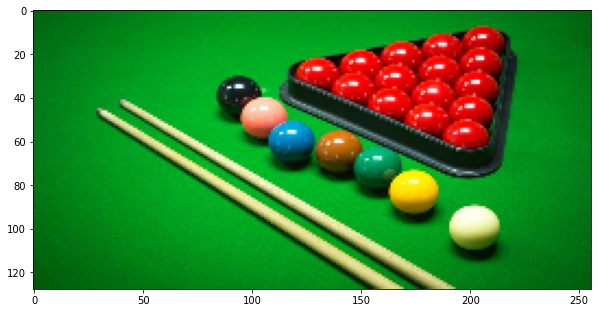

In [3]:
img = cv2.imread('data/balls4.jpg')
img = cv2.resize(img, (256, 128))
img_2d = img.reshape(-1, 3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img_1d = gray_img.reshape(-1, 1)
gray_img_1d = np.float32(gray_img_1d) / 255.

display_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
model = EAAcFCM(img_2d, 11)
best = model.run(10, 10)

0) Best Individual: V_XB - 0.23323823844818384, Clusters - 9
1) Best Individual: V_XB - 0.26119981945374127, Clusters - 8
2) Best Individual: V_XB - 0.09111187378137593, Clusters - 5
3) Best Individual: V_XB - 0.03801832099087714, Clusters - 3
4) Best Individual: V_XB - 0.038018320936952364, Clusters - 3
5) Best Individual: V_XB - 0.03801832072424141, Clusters - 3
6) Best Individual: V_XB - 0.03801832084427739, Clusters - 3
7) Best Individual: V_XB - 0.038018320853222445, Clusters - 3
8) Best Individual: V_XB - 0.038018320938361286, Clusters - 3
9) Best Individual: V_XB - 0.03801832201709143, Clusters - 3


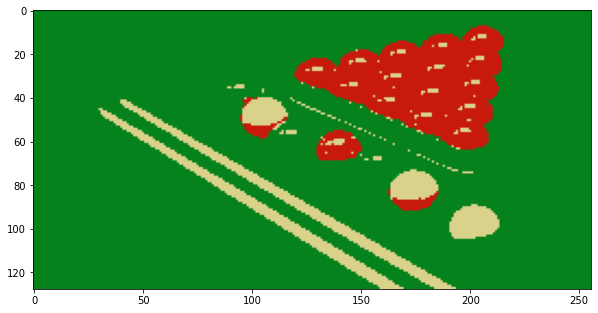

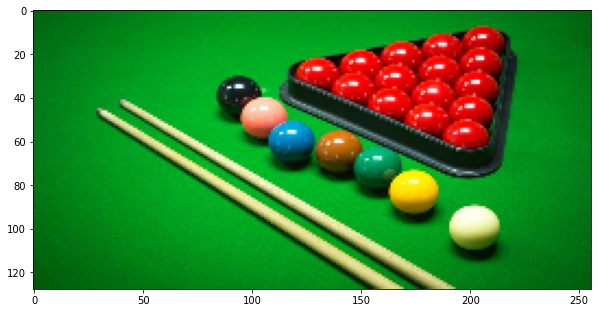

In [5]:
labels = np.argmax(best.U, axis=1)
color_mask = img_2d.copy()

for c in range(best.c):
    color_mask[labels == c] = np.mean(color_mask[labels == c], axis=0)
color_mask = color_mask.reshape(*gray_img.shape, 3)

display_img(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
display_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))